# Exploratory Data Analysis 8 (EDA08) 
Analysing Netflix's Data with Python Programming

---
Students: 

- Tailine, DC427182
- Zhong Wanyi, DC229805

In [65]:
# importing needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# loading the dataset
dataset = pd.read_csv('path/netflix.csv')

In [67]:
# checking dataset's information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [68]:
# checking the first 5 rows of the dataset
dataset.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [69]:
# Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.
print('There are',dataset.duplicated().sum(), 'duplicates in the dataset')

There are 2 duplicates in the dataset


In [70]:
# Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.
dataset.drop_duplicates(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


Since we saw that at first the dataset had 7789 rows, after removing the 2 duplicated rows, we have can see that the dataset now has 7787 rows.

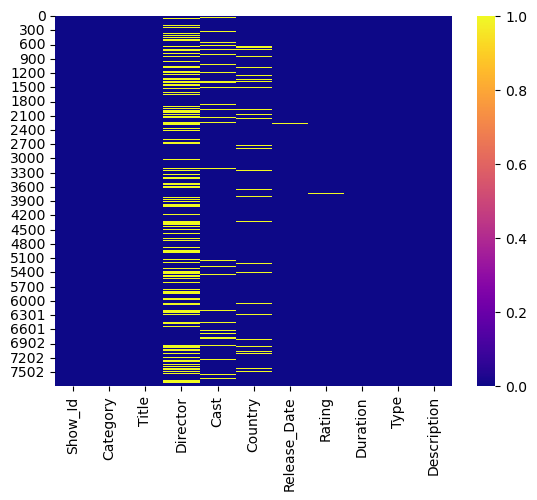

In [71]:
# Task. 2) Is there any Null Value present in any column ? Show with Heat-map.
sns.heatmap(dataset.isnull(), cmap='plasma')
plt.show()

In [72]:
# Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?
dataset[dataset['Title'] == 'House of Cards'][['Show_Id', 'Director']]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


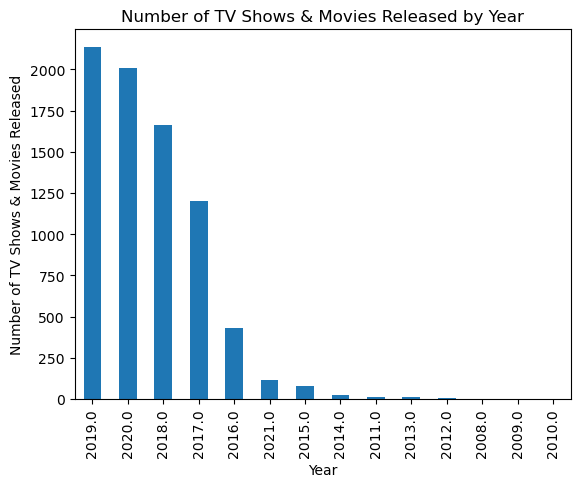

In [73]:
# Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.

# Converting the 'Release_Date' column to datetime
dataset['Data_N'] = pd.to_datetime(dataset['Release_Date'], errors='coerce')

# Extracting the year from the 'Release_Date' column
dataset['Year'] = dataset['Data_N'].dt.year

# Dropping rows with NaT in 'Release_Date'
dataset = dataset.dropna(subset=['Data_N'])

# Plotting the bar graph
dataset['Year'].value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows & Movies Released')
plt.title('Number of TV Shows & Movies Released by Year')
plt.show()

Text(0.5, 1.0, 'Number of Movies & TV Shows in the Dataset')

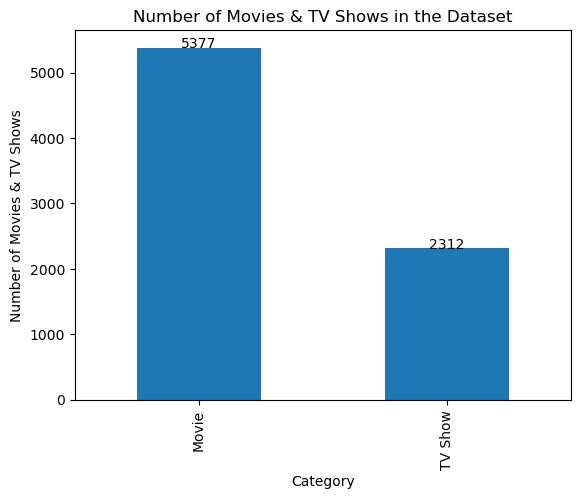

In [74]:
# Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
category_counts = dataset['Category'].value_counts()
category_counts.plot(kind='bar')
for i in range(len(category_counts)):
    plt.text(i, category_counts.iloc[i], category_counts.iloc[i], ha='center')
plt.xlabel('Category')
plt.ylabel('Number of Movies & TV Shows')
plt.title('Number of Movies & TV Shows in the Dataset')

In [75]:
# Q. 4) Show all the Movies that were released in year 2000.
dataset[(dataset['Category'] == 'Movie') & (dataset['Year'] == 2000)]['Title']

Series([], Name: Title, dtype: object)

There are no Movies (or even TV Shows) from the year of 2000. As we could already notice on Q.2. 
Release years on this dataset go from 2008 to 2019.

In [76]:
# Q. 5) Show only the Titles of all TV Shows that were released in India only.
dataset[(dataset['Category'] == 'TV Show') & (dataset['Country'] == 'India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 70, dtype: object

In [77]:
# Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
dataset['Director'].value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          10
David Dhawan               9
Johnnie To                 8
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 Directors with the Highest Number of TV Shows & Movies')

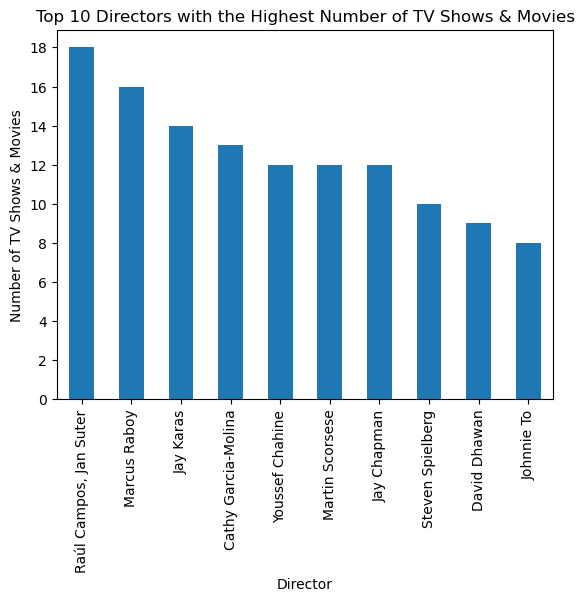

In [78]:
# Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix
dataset['Director'].value_counts().head(10).plot(kind='bar')
#adjust y axis
plt.yticks(range(0, 20, 2))
plt.xlabel('Director')
plt.ylabel('Number of TV Shows & Movies')
plt.title('Top 10 Directors with the Highest Number of TV Shows & Movies')

In [79]:
# Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
dataset[(dataset['Category'] == 'Movie') & (dataset['Type'] == 'Comedies') | (dataset['Country'] == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Data_N,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01,2019.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01,2017.0
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01,2019.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18,2020.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31,2017.0


In [80]:
# Q. 8) In how many movies/shows, Tom Cruise was cast ?
dataset[dataset['Cast'].str.contains('Tom Cruise', na=False)]['Title']

3860    Magnolia
5071    Rain Man
Name: Title, dtype: object

In [81]:
# Q. 9) What are the different Ratings defined by Netflix ?
dataset['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [82]:
# Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?
dataset[(dataset['Category'] == 'Movie') & (dataset['Rating'] == 'TV-14') & (dataset['Country'] == 'Canada')][['Title', 'Rating']]

,Title,Rating
30,#cats_the_mewvie,TV-14
34,#Roxy,TV-14
608,At First Light,TV-14
1506,Counterfeiting in Suburbia,TV-14
3713,Long Time Running,TV-14
3956,"Martin Matte: La vie, la mort...eh la la..!",TV-14
5336,Sadie's Last Days on Earth,TV-14
5393,Sardaar ji,TV-14
6062,The Accountant of Auschwitz,TV-14
7025,The Wrong Babysitter,TV-14


In [83]:
# Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?
dataset[(dataset['Category'] == 'TV Show') & (dataset['Rating'] == 'R') & (dataset['Year'] > 2018)][['Title', 'Rating']]

,Title,Rating
6437,The Hateful Eight: Extended Version,R


In [84]:
# Q. 10) What is the maximum duration of a Movie/Show on Netflix ?

# Extracting the 'Minutes' and 'Units' from the 'Duration' column
dataset[['Number', 'Units']] = dataset['Duration'].str.split(' ', expand=True)
dataset[['Number','Units']].head()

# Converting the 'Minutes' column to numeric
dataset['Number'] = pd.to_numeric(dataset['Number'])

# Finding the maximum duration (filtering out the Units that are not 'min')
dataset[dataset['Units'] == 'min']['Number'].max()


312

In [85]:
# Q. 11) Which individual country has the Highest No. of TV Shows ?
dataset[dataset['Category'] == 'TV Show']['Country'].value_counts().head(1)

Country
United States    665
Name: count, dtype: int64

In [86]:
# Q. 12) How can we sort the dataset by Year ?
dataset.sort_values('Year')

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Data_N,Year,Number,Units
7115,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2008-01-01,2008.0,81,min
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2008-02-04,2008.0,1,Season
3248,s3249,Movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2009-05-05,2009.0,104,min
5766,s5766,Movie,Splatter,Joe Dante,"Corey Feldman, Tony Todd, Tara Leigh, Erin Way...",United States,"November 18, 2009",TV-MA,29 min,Horror Movies,"After committing suicide, a washed-up rocker r...",2009-11-18,2009.0,29,min
3840,s3841,Movie,Mad Ron's Prevues from Hell,Jim Monaco,"Nick Pawlow, Jordu Schell, Jay Kushwara, Micha...",United States,"November 1, 2010",NR,84 min,"Cult Movies, Horror Movies","This collection cherry-picks trailers, forgott...",2010-11-01,2010.0,84,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands","January 8, 2021",TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri...",2021-01-08,2021.0,85,min
6248,s6248,Movie,The Creative Brain,"Jennifer Beamish, Toby Trackman",David Eagleman,United States,"January 1, 2021",TV-14,53 min,Documentaries,Neuroscientist David Eagleman taps into the cr...,2021-01-01,2021.0,53,min
1919,s1920,Movie,Eddie Murphy: Raw,Robert Townsend,Eddie Murphy,United States,"January 1, 2021",R,90 min,Stand-Up Comedy,This stand-up comedy classic features Eddie Mu...,2021-01-01,2021.0,90,min
4864,s4864,Movie,Pinkfong & Baby Shark's Space Adventure,Byeon Hee-sun,"Jo Kyoung-i, Kim Seo-yeong, Kim Eun-ah, Jeong ...",NaN,"January 15, 2021",TV-Y,65 min,Children & Family Movies,"Joined by new friends from other planets, Pink...",2021-01-15,2021.0,65,min


In [87]:
# Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.
dataset[(dataset['Category'] == 'Movie') & (dataset['Type'] == 'Dramas') | (dataset['Category'] == 'TV Show') & (dataset['Type'] == 'Kids TV')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Data_N,Year,Number,Units
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0,123,min
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...,2019-11-01,2019.0,119,min
170,s171,Movie,A Family Man,Mark Williams,"Gerard Butler, Gretchen Mol, Alison Brie, Will...","Canada, United States","December 15, 2019",R,110 min,Dramas,A ruthless corporate headhunter battles his ri...,2019-12-15,2019.0,110,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011.0,95,min
295,s296,Movie,Across Grace Alley,Ralph Macchio,"Ben Hyland, Marsha Mason, Karina Smirnoff, Col...",United States,"December 1, 2016",TV-PG,24 min,Dramas,"A young boy, upset by his parents' divorce, be...",2016-12-01,2016.0,24,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,s7416,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",2017-07-24,2017.0,110,min
7422,s7421,Movie,Villain,Philip Barantini,"Craig Fairbrass, George Russo, Robert Gleniste...",United Kingdom,"September 5, 2020",R,97 min,Dramas,"Fresh out of prison, an ex-con tries to save h...",2020-09-05,2020.0,97,min
7449,s7448,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,2019-06-19,2019.0,99,min
7465,s7464,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,2019-03-02,2019.0,109,min
